In [ ]:
# Import statements
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
import datetime as dt
import matplotlib.patches as mpatches
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM, Dense

# loading the data set using a gdrive link from
#  google drive where i uploaded my csv file
url = 'https://drive.google.com/file/d/1fNeUMzbdbWZJvuSBypK3kGoQjYST9PKm/view?usp=sharing' 
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
# df = pd.read_csv(url)

# Load the data from CSV file and parses data and time column
#  to a single Datatime column 

data = pd.read_csv(url, parse_dates=[['date', 'time']])
# sets date_time column as the index of the dataframe
data = data.set_index('date_time')

# Split the data into train and test sets
# the original data contains date,time,power,temperature,humdity from
# 2021-12-01 00:00:00 to 2022-12-31 23:45:00 1yr+1month data
# we are training it on 1 yr and testing it on the leftover 1 month data
# i.e, 2022-12-01 00:00:00 to 2022-12-31 23:45:00
train_data = data.loc['2021-12-01 00:00:00':'2022-11-30 23:45:00']
test_data = data.loc['2022-12-01 00:00:00':'2022-12-31 23:45:00']

# Normalize the data
mean = train_data.mean()
std = train_data.std()
train_data = (train_data - mean) / std
test_data = (test_data - mean) / std

# Define the function to create the input and output sequences
def create_sequences(data, seq_length):
    # Initialize empty lists to store input and output sequences
    X = []
    y = []
    # Loop over the data starting from index 0 and ending at the index seq_length before the end of data
    for i in range(len(data) - seq_length):
        # Append the sequence of data starting from i and ending at i+seq_length to the input sequence list
        X.append(data.iloc[i:i+seq_length])
        # Append the value at index i+seq_length to the output sequence list
        y.append(data.iloc[i+seq_length])
    # Convert the input and output sequence lists to numpy arrays and return them
    return np.array(X), np.array(y)

# Define the sequence length
seq_length = 4*24*7 # 4 weeks

# Create the input and output sequences for training and testing
X_train, y_train = create_sequences(train_data, seq_length)
X_test, y_test = create_sequences(test_data, seq_length)

# Define the LSTM model
model = Sequential()
model.add(LSTM(64, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(y_train.shape[1]))
model.compile(loss='mse', optimizer='adam')

# Train the LSTM model
history = model.fit(X_train, y_train, epochs=50, batch_size=64, validation_split=0.1, verbose=1)

# Make predictions on the test set
y_pred = model.predict(X_test)



<ipython-input-2-234521aa383a>:25: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  train_data = data.loc['2021-12-01 00:00:00':'2022-11-30 23:45:00']


Epoch 1/50
469/469 [==============================] - 202s 425ms/step - loss: 0.0716 - val_loss: 0.0403
Epoch 2/50
469/469 [==============================] - 200s 427ms/step - loss: 0.0318 - val_loss: 0.0378
Epoch 3/50
469/469 [==============================] - 195s 416ms/step - loss: 0.0304 - val_loss: 0.0401
Epoch 4/50
 49/469 [==>...........................] - ETA: 2:54 - loss: 0.0335

In [ ]:
data.head()

,power,temperature,humidity
date_time,,,
2021-01-12 00:00:00,465.29,21.10,92.1
2021-01-12 00:15:00,457.44,21.02,92.4
2021-01-12 00:30:00,450.22,21.02,92.6
2021-01-12 00:45:00,441.40,21.03,92.8
2021-01-12 01:00:00,431.86,20.95,93.1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 38016 entries, 2021-01-12 00:00:00 to 2022-12-31 23:45:00
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   power        38016 non-null  float64
 1   temperature  38016 non-null  float64
 2   humidity     38016 non-null  float64
dtypes: float64(3)
memory usage: 1.2 MB


<Axes: xlabel='date'>

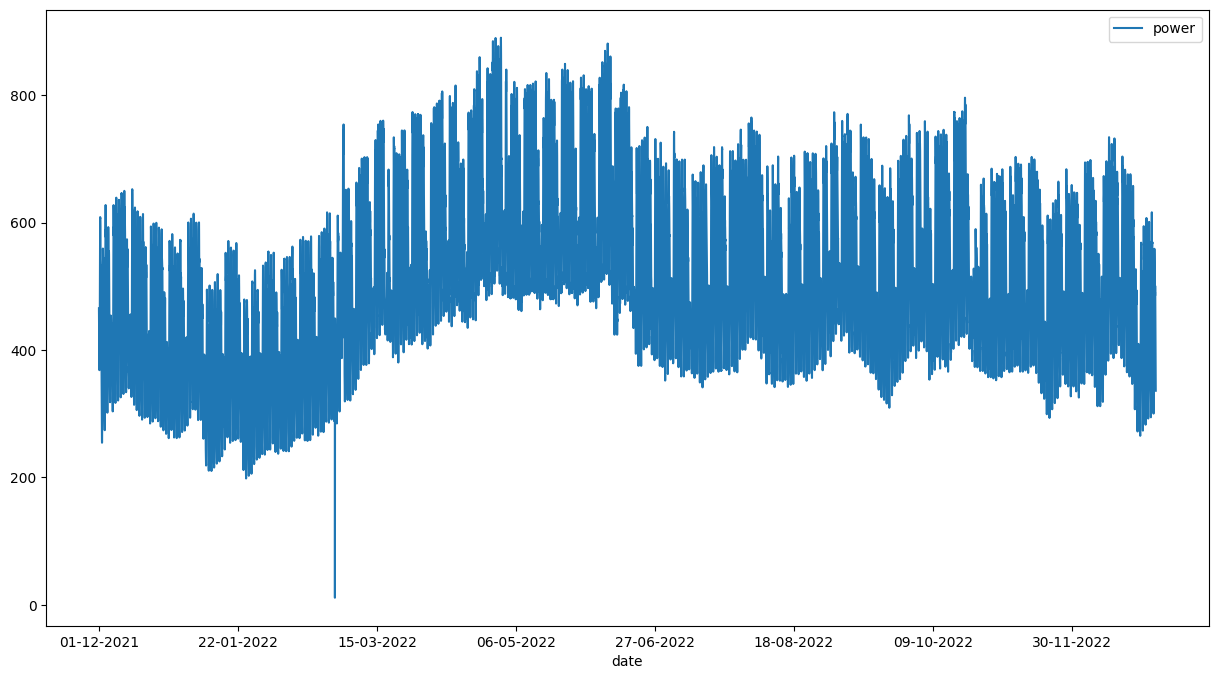

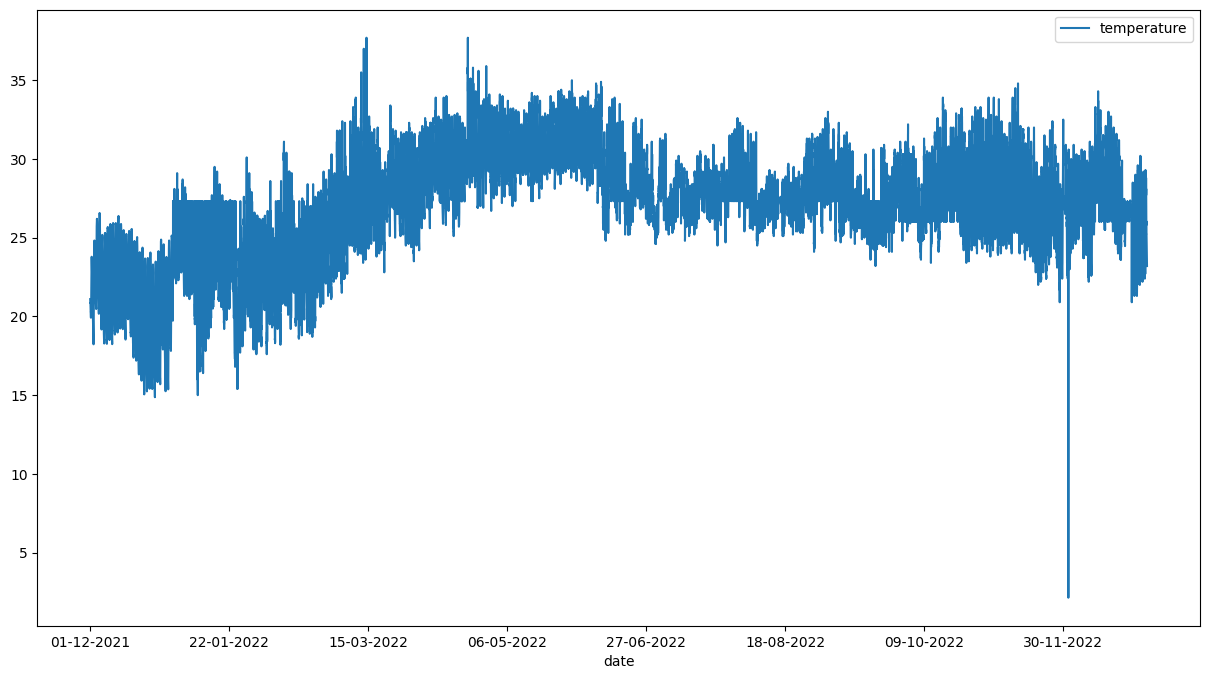

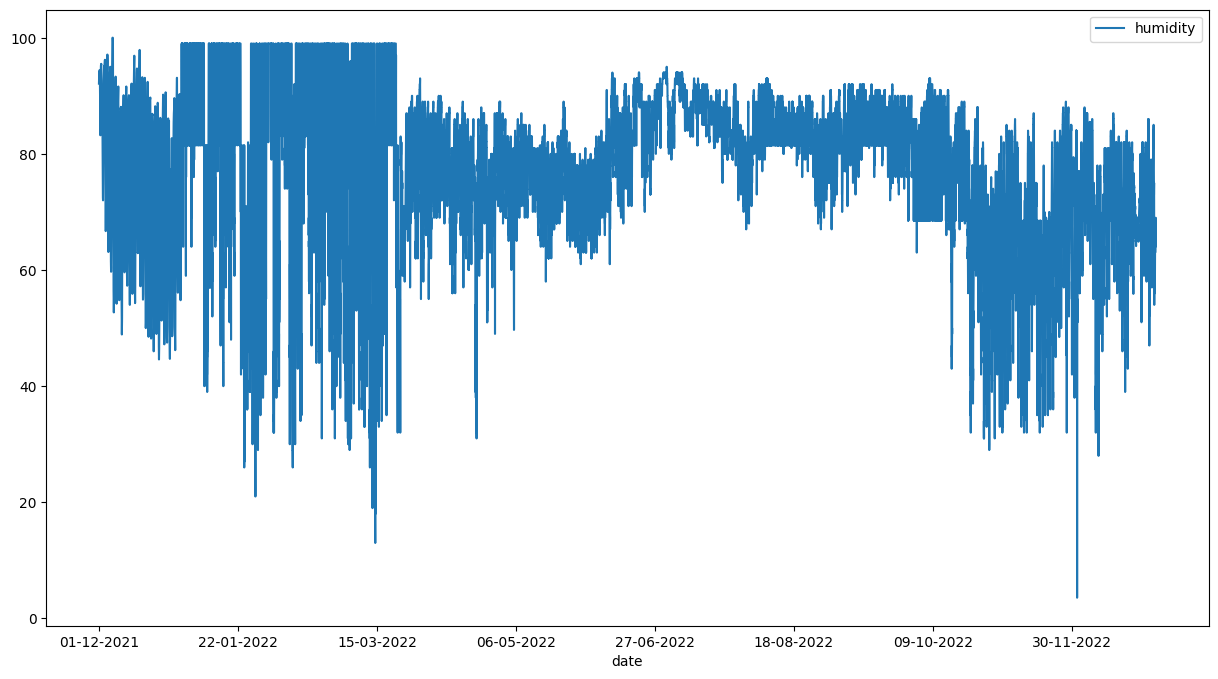

In [ ]:
data1=pd.read_csv(url)
data1.plot(x='date',y='power',figsize=(15,8))
data1.plot(x='date',y='temperature',figsize=(15,8))
data1.plot(x='date',y='humidity',figsize=(15,8))

<ipython-input-24-da27cbdc12aa>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data1.corr(),annot=True, cbar=False, cmap='Blues', fmt='.1f')


<Axes: >

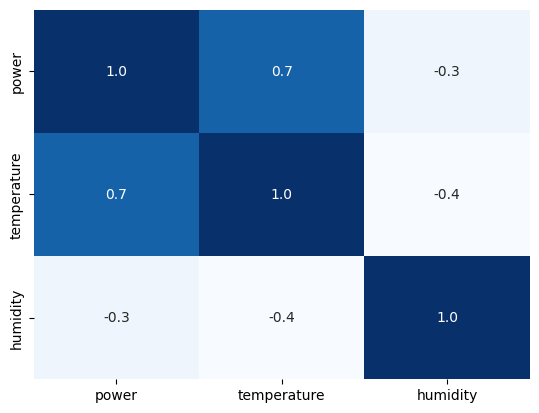

In [ ]:
sns.heatmap(data1.corr(),annot=True, cbar=False, cmap='Blues', fmt='.1f')

<Axes: xlabel='power'>

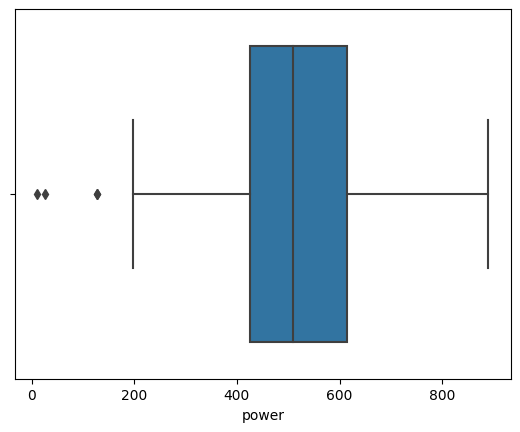

In [ ]:
sns.boxplot(x=data1['power'])

<Axes: xlabel='temperature'>

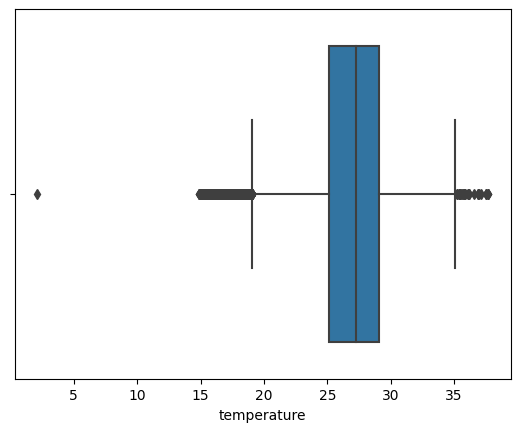

In [ ]:
sns.boxplot(x=data1['temperature'])

<Axes: xlabel='humidity'>

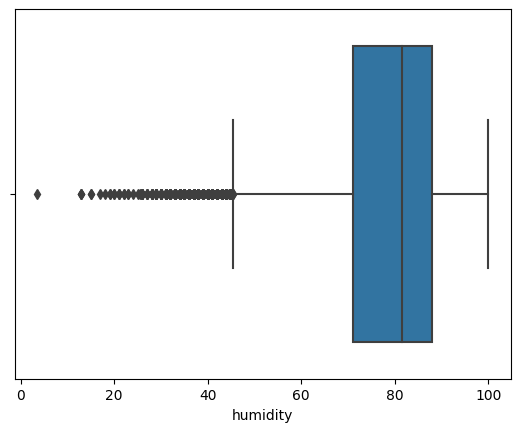

In [ ]:
sns.boxplot(x=data1['humidity'])

In [ ]:
model.evaluate( X_test,y_test)

72/72 [==============================] - 1s 14ms/step - loss: 0.0272


0.027151521295309067

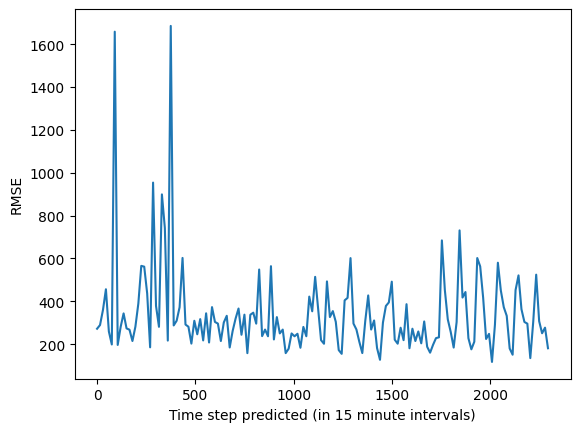

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Normalize the data
# y = (y - mean) / std

# Denormalize the predictions and targets
# y_pred = (y_pred * std.values.reshape(1, -1, 1)) + mean.values.reshape(1, -1)
# y_test = (y_test * std.values.reshape(1, -1, 1)) + mean.values.reshape(1, -1)

# Denormalize the predictions and targets
y_pred = (y_pred * std.values.reshape(1, -1)) + mean.values.reshape(1, -1)
y_test = (y_test * std.values.reshape(1, -1)) + mean.values.reshape(1, -1)

# Define the function to calculate the error
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

# Calculate the error for every 15 minutes and multiples of 15 minutes
step = 15
error = []
for i in range(0, len(y_test), step):
    error.append(rmse(y_pred[i:i+step], y_test[i:i+step]))

# Plot the error vs time step predicted
plt.plot(np.arange(0, len(y_test), step), error)
plt.xlabel('Time step predicted (in 15 minute intervals)')
plt.ylabel('RMSE')

# Update the axis labels to show important time stamps
plt.xticks([0, 96,96*2,96*3 672, 2016, 4032, 8640, 25920], ['0', '1 day', '1 week', '3 weeks', '6 weeks', '3 months', '9 months'])

plt.show()


In [ ]:
# Predict power consumption for test data
test_input_resampled = test_input.set_index('datetime').resample('15T').ffill()
test_output_resampled = test_output.set_index('datetime').resample('15T').ffill()
freqs = []
rmse = []
for i in range(1, 97):
    if i <= 3:
        freq = f'{i*15}T'
        freq_label = f'{i*15} minutes'
    elif i <= 24:
        freq = f'{i}H'
        freq_label = f'{i} hours'
    else:
        freq = f'{i//24}D'
        freq_label = f'{i//24} days'
    test_input_resampled_freq = test_input_resampled.resample(freq).ffill()
    test_output_resampled_freq = test_output_resampled.resample(freq).ffill()
    test_input_scaled_freq = scaler.transform(test_input_resampled_freq)
    test_output_pred = model.predict(test_input_scaled_freq.reshape(-1, 96, 4))
    test_output_pred_resampled = pd.Series(test_output_pred.flatten(), index=test_output_resampled_freq.index)
    rmse_freq = mean_squared_error(test_output_resampled_freq, test_output_pred_resampled, squared=False)
    freqs.append(freq_label)
    rmse.append(rmse_freq)

# Plot error vs frequency
plt.plot(freqs, rmse)
plt.xlabel('Frequency')
plt.ylabel('RMSE')
plt.show()

In [ ]:
https://github.com/AISCIENCES/Ytube-rfp/blob/main/Rainfall%20Prediction.ipynb